# Speed Data Collection

## Setup

In [139]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt
LOG.propagate = False

# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2022-02-17 21:58:09,973 | INFO     |: Already connected to a BLE device


## Get the Serial Monitor for data collection stuff

In [140]:
data = []

# Record received float notifications 
def handle_recv_str(uuid, val):
  global data
  data.append(val)

ble.start_notify(ble.uuid['RX_STRING'], handle_recv_str)

# Wait for three seconds before stopping notifications
# to avoid flooding the notebook output
time.sleep(3)
ble.stop_notify(ble.uuid['RX_STRING'])
print(data)


[bytearray(b'556317:3313'), bytearray(b'556411:3313'), bytearray(b'556509:3322'), bytearray(b'556606:3307'), bytearray(b'556711:3317'), bytearray(b'556807:3323'), bytearray(b'556913:3306'), bytearray(b'557007:3324'), bytearray(b'557113:3256'), bytearray(b'557207:2672'), bytearray(b'557304:1844'), bytearray(b'557410:1364'), bytearray(b'557504:874'), bytearray(b'557610:506'), bytearray(b'557704:422'), bytearray(b'557812:447'), bytearray(b'557906:715'), bytearray(b'558010:710'), bytearray(b'558103:848'), bytearray(b'558207:794'), bytearray(b'558300:788'), bytearray(b'558404:782'), bytearray(b'558497:784'), bytearray(b'558604:786'), bytearray(b'558700:787'), bytearray(b'558804:783'), bytearray(b'558900:787'), bytearray(b'559004:782'), bytearray(b'559100:782'), bytearray(b'559204:780')]


In [141]:
new_data = [n.decode() for n in data]
times = []
distances = []
for d in new_data:
  s = d.split(":")
  times.append(int(s[0]))
  distances.append(int(s[1]))

print(f"Time (ms): {times}")
print(f"Distance (mm): {distances}")


Time (ms): [556317, 556411, 556509, 556606, 556711, 556807, 556913, 557007, 557113, 557207, 557304, 557410, 557504, 557610, 557704, 557812, 557906, 558010, 558103, 558207, 558300, 558404, 558497, 558604, 558700, 558804, 558900, 559004, 559100, 559204]
Distance (mm): [3313, 3313, 3322, 3307, 3317, 3323, 3306, 3324, 3256, 2672, 1844, 1364, 874, 506, 422, 447, 715, 710, 848, 794, 788, 782, 784, 786, 787, 783, 787, 782, 782, 780]


## Plots

### Position vs Time

Text(0, 0.5, 'Distance from wall, mm')

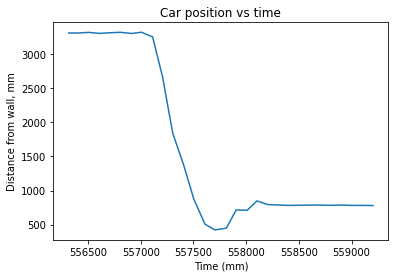

2022-02-17 22:01:45,735 | INFO     |: Disconnected from 7AE0A3CC-63D5-13D9-39BA-D29A7DC67D14


In [142]:
plt.plot(times, distances)
plt.title("Car position vs time")
plt.xlabel("Time (mm)")
plt.ylabel("Distance from wall, mm")